# Deutsch-Jozsa Algorithm

このセクションでは、最初にドイツジョザ問題(Deutsch-Jozsaa problem)と、それを解決する多雨の古典的アルゴリズムと量子アルゴリズムを紹介します。次に、Qiskitを使用して量子アルゴリズムを実装し、シュミレーターとデバイスで実行します。

## 1. Introduction

Deutsch-Jozsaアルゴリズムは、最高の古典的アルゴリズムよりもパフォーマンスが高い量子アルゴリズムの最初の例でした。特定の問題の計算ツールとして量子コンピュータを使用することには利点があることを示しました。

### 1.1 Deutsch-Jozsa Problem

ビットの文字列を入力として受け取り、0または1を返す非表示のブール関数(Boolean function)$f$が与えられます。

f({$x_0, x_1, x_2,...$})　→ 0or1,where $x_n$ is 0 or 1

与えられたブール関数の特性は、バランスが取れている、または定数であることが保証されていることです。定数関数は全ての入力に対して全て0または1を返しますが、バランスllc 何数は全ての入力のちょうど半分に対して0を返し、残りの半分に対して1を返します。私たちの仕事は、与えられた関数がバランスが取れているか、一定であるかを判断することです。

Deutsch-Jozsa問題は、single bit Deutsch Problemのnビット拡張であることに注意してください。

### 1.2 The Classical Solution

古典的には、最良のケースでは、オラクルへの2つのクエリで、隠れたブール関数$f(x)$がバランスしているかどうかを判断できます。$f(0,0,0,...)$→0と$f(1,0,0,...)$→1の両方を取得すると、2つの異なる出力が得られたので、関数のバランスが取られていることがわかります。

最悪の場合、試行する各入力に対して同じ出力が引き続き表示される場合は、possible(x)が定数であることを確認するために、全ての可能な入力のちょうど半分に1を加えたものをチェックする必要があります。可能な入力の総数は$2n$であるため、最悪の場合$f(x)$が一定であることを確認するには、$2^{n-1}+1$試行入力が必要であることを意味します。例えば、4ビット文字列の場合、16の可能な組み合わせのうち8つをチェックして全て0を取得した場合でも、9番目の入力が1を返し、$f(x)$がバランスしている可能性があります。確率的に、これは非常に稀なイベントです。実際、継続的に同じ結果が得られる場合、関数が一定である確率をk入力の関数として次のように表すことができます。

$P_{constant}(k) = 1- \frac{1}{2^{k-1}}$  &emsp;   for $k≤ 2^{n-1}$

現実的には、$x$%を超えるという確信があるときなど、古典的なアルゴリズムを早期に切り捨てることを選択できます。しかし、100%の信頼を得たい場合は、$2^{k-1}+1$入力をチェックする必要があります。

### 1.3 Quantum Solution

量子コンピュータを使用して、関数$f(x)$を1回呼び出すだけで、この問題を100%の信頼度で解決できます。ただし、関数$f$を量子オラクルとして実装し、状態|x>|y>を|x>|y⊕f(x)>にマップします。ここで、⊕は2を法とする加算です。以下は、Deutsh-Jozsaアルゴリズムの一般的な回路です。

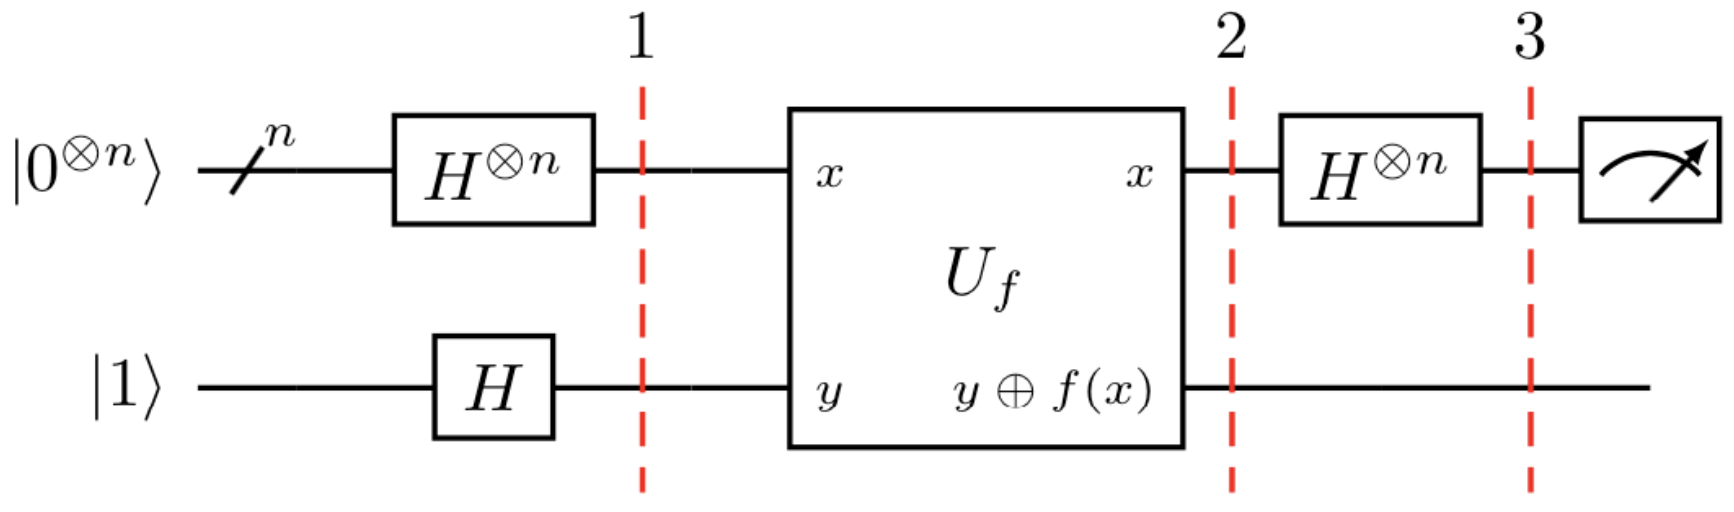

それでは、アルゴリズムのステップを見ていきましょう。

1. 2つの量子レジスタを準備します。1つ目は|0>に初期化された$n-qubit$レジスタで、2つ目は|1>に初期化された$1Qubit$レジスタです。

$|ψ_0>=|0>^{⊗n}|1>$

2. 各$Qubit$にアダマールゲートを適用します。

$|ψ_1> = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}|x>(|0>-|1>)$

3. 量子オラクル$|x>|y>$を$ |𝑥⟩|𝑦⊕𝑓(𝑥)⟩ $に適用します。

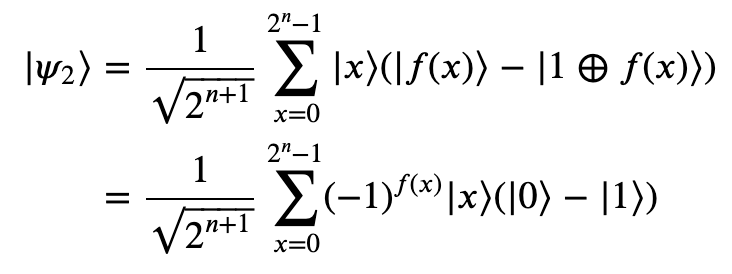

各$x$について、$f(x)$は$0$または$1$のいずれかです。

4. この時点で、2番目の単一Qubitレジスタは無視できます。最初のレジスタの各$Qubit$にアダマールゲートを適用します。

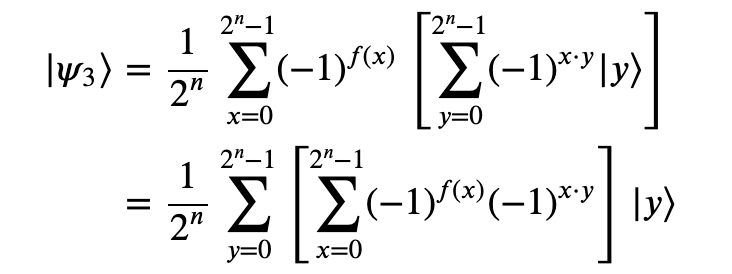

ここで、$x×y=x_0y_0⊕x_1y_1⊕...⊕x_{n-1}y_{n-1}$はビットごとの積の合計です。

5. 最初のレジスタを測定します。$|0>^{⊕n}=|\frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|^2$を測定する確率は、$f(x)$がConstant(定数?)の場合は$1$、$f(x)$がBalancedの場合は$0$に評価されることに注意してください。

### 1.4 Why Does This Work?

#### ・Constant Oracle

オラクルが一定である場合、それは入力qubitに(グローバルフェーズまで)影響を与えず、オラクルをクエリする前と後の量子状態は同じです。Hゲートはそれ自体が逆なのでステップ4でステップ2を逆にして、最初のレジスターで|00...0>の初期量子状態を取得します。

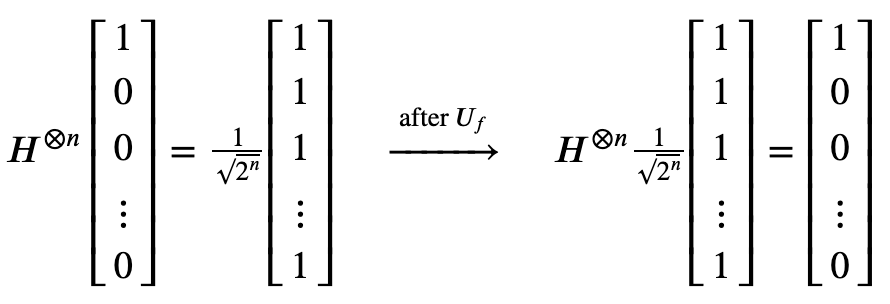

#### ・Balanced Oracle

ステップ2の後、入力レジスターは、計算ベースの全ての状態の等しい重ね合わせになります。オラクルのバランスが取れている場合、フェーズキックバックにより、これらの状態のちょうど半分に負のフェーズが追加されます。

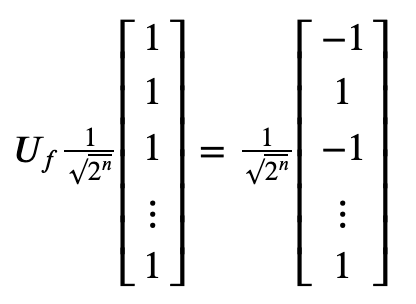

オラクルにクエリした後の量子状態は、その前の量子状態に直交しています。従って、ステップ4では、Hゲートを適用するときに、|00...0>に直交する量子状態になる必要があります。つまり、全て$0$の状態を測定することはないべきです。

## 2. Worked Example

two bit balanced functionの具体例を見てみましょう。

1. 2つのqubitの最初のレジスタは|00>に初期化され、2番目のレジスタqubitは|1>に初期化されます。(qubitにインデックスをつけるために、添え字1,2,3を使用していることに注意してください。添え字"12"は、qubit1及び2を含むレジスタ)

$|ψ_0>=|00>_{12}⊗|1>_3$

2. 全てのqubitsにアダマールゲートを適用します。

$|ψ_1>=\frac{1}{2}(|00>+|01>+|10>+|11>)_{12}⊗\frac{1}{\sqrt{2}}(|0>-|1>)_3$

3. Oracle関数は$Q_f=CX_{13}CX{23}$として実装できます。

$|ψ_2>=\frac{1}{2\sqrt{2}}[|00>_{12}⊗(|0⊗0⊗0>-|1⊗0⊗0)_3+|01>_{12}⊗(|0⊗0⊗1>-|1⊗0⊗1>)_3+|10>_{12}⊗|0⊗1⊗0>-|1⊗1⊗0>)_3+|11>_{12}⊗(|0⊗1⊗1>-|1⊗1⊗1>)_3$

4. これを単純化すると、次のようになります。

$|ψ_2>=\frac{1}{2\sqrt{2}}[|00>_{12}⊗(|0>-|1>)_3)-|01>_{12}⊗(|0>-|1>)_3-|10>_{12}⊗(|0>-|1>)_3+|11>_{12}⊗(|0>-|1>)_3]$

$=\frac{1}{2}(|00>-|01>-|10>+|11>)_{12}⊗\frac{1}{\sqrt{2}}(|0>-|1>)_3$

$=\frac{1}{\sqrt{2}}(|0>-|1>)_1⊗\frac{1}{\sqrt{2}}(|0>-|1>)_2⊗\frac{1}{\sqrt{2}}(|0>-|1>)_3$

5. 最初のレジスタにアダマールゲートを適用する。

$|ψ_3>|1>_1⊗|1>_2⊗(|0>-|1>)_3$

6. 最初の2つのqubitを測定すると、$non-zero 11$が得られ、バランスの取れた関数であることを示します。

以下のウィジェットを使用して、同様の例を試すことができます。ボタンを押してHゲートとオラクルを追加し、セルを際実行するか、case="constant"を設定して別のオラクルを試してください。

In [20]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

ModuleNotFoundError: No module named 'qiskit_textbook'

## 3. Creating Quantum Oracles

量子オラクルを作成する方法をいくつか見てみましょう。

$constant function$の場合、それは簡単です。

1. $f(x)=0$の場合、レジスタ2の$qubit$に$I$ゲートを適用します。

2. $f(x)=1$の場合、$X$ゲートをレジスタ2の$qubit$に適用します。

$balanced function$の場合、様々な回路を作成できます。回路のバランスを保証できる方法の1つは、レジスタ2の$qubit$をターゲットとして、レジスタ1の各$qubit$に対して$CNOT$を実行することです。例えば

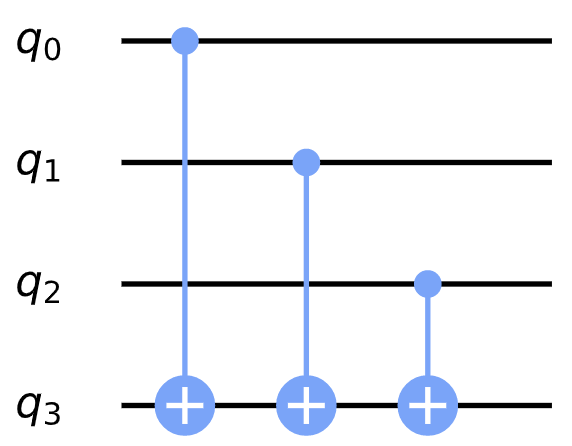

上の画像では、上の3つの$qubit$が入力レジスタを形成し、下の$qubit$が出力レジスタです。次の表で、どの入力状態がどの出力を与えるかを確認できます。

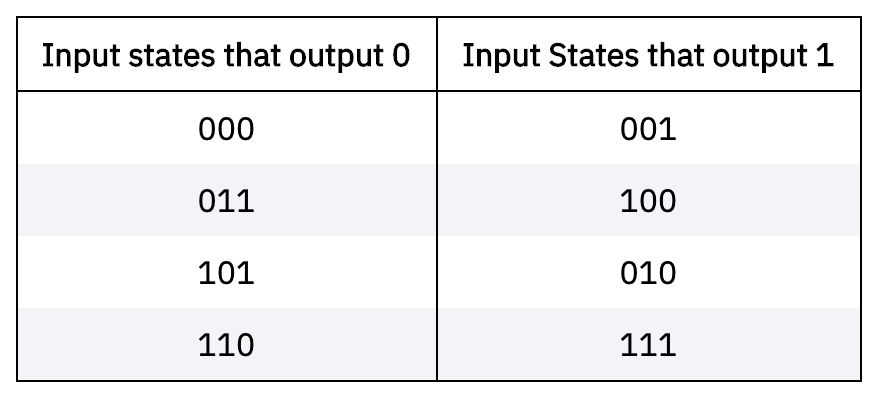

選択したコントロールを$X$ゲートでラップすることにより、バランスを保ちながら結果を変更できます。例えば、以下の回路とその結果表を参照してください。

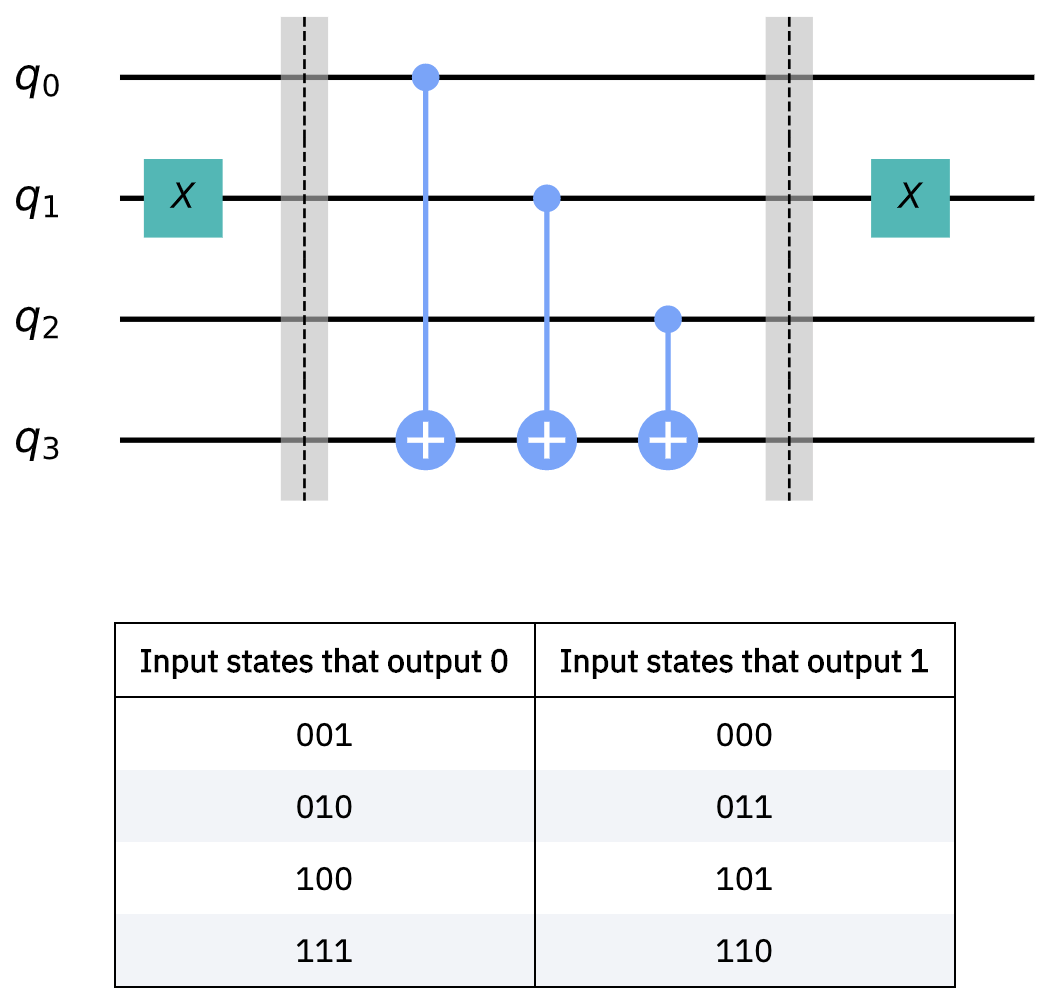

## 4. Qiskit Implementation

次に、$constant\,oracle$と$balanced\,oracle$の両方を使用して、3bit functionの例のDeutsch-Jozsaアルゴリズムを実装します。最初にインポートを行いましょう。

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

次に、Oracleの入力レジスタのサイズを設定します。

In [2]:
# set the length of the n-bit input string. 
n = 3

### 4.1 Constant Oracle

まず$Constant\,Oracle$を作成してみましょう。この場合、入力は出力に影響しないため、出力qubitをランダムに$0$または$1$に設定します。

In [3]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

### 4.2 Balanced Oracle

In [4]:
balanced_oracle = QuantumCircuit(n+1)

次に、$Balanced\,Oracle$を作成します。セクション1bで見たように、各入力qubitをコントロールとして、出力ビットをターゲットとして$CNOT$を実行することにより、$Balanced\,Oracle$を作成できます。$X$ゲートでいくつかのコントロールをラップすることにより、$0$または$1$を与える入力状態を変えることができます。ラップするコントロールを指定する長さ$n$のバイナリ文字列を最初に選択しましょう。

In [5]:
b_str = "101"

これでこの文字列ができたので、$X$ゲートを配置するためにキーとして使用できます。回路の各qubitについて、b_strの対応する桁が$1$の場合は$X$ゲートを配置し、桁が$0$の場合は何も行いません。

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

次に、$controlled-NOT$ゲートを実行し、各入力qubitをコントロールとして使用し、出力qubitをターゲットとして使用します。

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

最後に、2つのセルのコードを繰り返して、$X$ゲートのコントロールのラップを完了します。

In [8]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

これで$balanced\,oracle$が完成しました。あとは、Deutsch-Joza algorithmで解けるか確認するだけです。

### 4.3 The Full Algorithm

全てをまとめましょう。アルゴリズムのこの最初のステップは、状態|+>の入力qubitと状態|->の出力qubitを初期化することです。

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c_0: ══════════
               
c_1: ══════════
               
c_2: ══════════

次に、オラクルを適用しましょう。ここでは、上で作った$balanced\,oracle$を適用します。

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c_0: ════════════════════════════════════
                                         
c_1: ════════════════════════════════════
                                         
c_2: ════════════════════════════════════

最後に、$n$入力qubitで$H$ゲートを実行し、入力レジスタを測定します。

In [11]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c_0: ═════════════════════════════════════════════╩══╬══╬═
                                                     ║  ║ 
c_1: ════════════════════════════════════════════════╩══╬═
                                                        ║ 
c_2: ═══════════════════════════════════════════════════╩═

出力を見てみましょう。

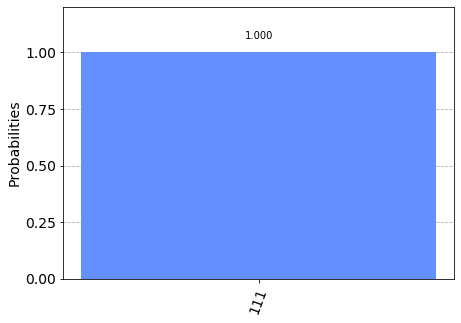

In [12]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

上記の結果から、$000$を測定する可能性は0%であることがわかります。これにより、functionが$balanced$していることが適切に予測されます。

### 4.4 Generalised Circuits

以下に、Deutsch-Jozaオラクルを作成し、それらを量子ゲートに変換する"$Generalised\,function$"(一般化された関数)を示します。これには、「balanced」または「constant」のいずれか、及び入力レジスターのサイズ$n$が必要です。

In [13]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

このオラクルゲートを受け取り、それに対してDeutsch-Jozaアルゴリズムを実行する関数も作成します。

In [14]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

最後に、これらの関数を使用してアルゴリズムをいじりましょう(^ ^)

In [15]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c_0: ═══════════════════════════╩══╬══╬══╬═
                                   ║  ║  ║ 
c_1: ══════════════════════════════╩══╬══╬═
                                      ║  ║ 
c_2: ═════════════════════════════════╩══╬═
                                         ║ 
c_3: ════════════════════════════════════╩═

この回路の結果を見てみましょう。

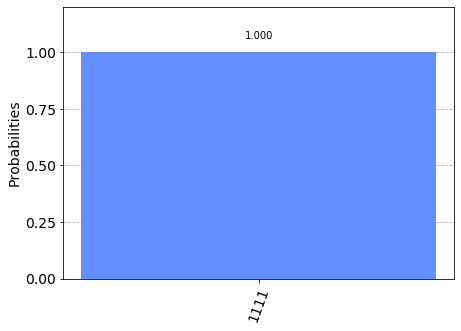

In [16]:
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. Experiment with Real Devices

以下に示すように、実際のデバイスで回路を実行できます。最初に、回路を処理できる最もbusyでないデバイスを探しましょう。

In [17]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_16_melbourne


In [18]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


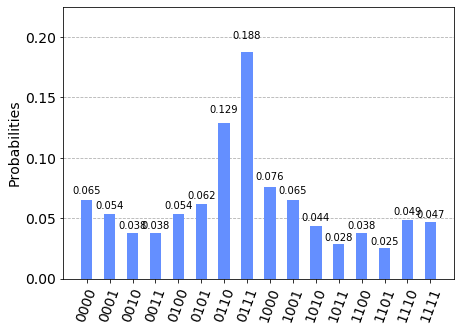

In [19]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)